## Setup environment

In [1]:
from simulators.grid_world.grid_world import Maze
from simulators.grid_world.metrics import compute_bad_steps

grid_type = "simple"

feature_type = None
dimensions = None
sigma = None

# feature_type = "similarity"
# dimensions = 100
# sigma = 0.25

n_tries_for_std = 10

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

### Change reward to granular setting

In [3]:
from simulators.grid_world.grid_world import set_granular_reward, set_normilized_reward, divide_reward_by

env = set_granular_reward(env)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## DQfD

#### Try with logs and plots

End of expert phase


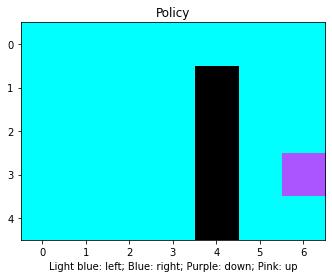

Beginning of rl phase


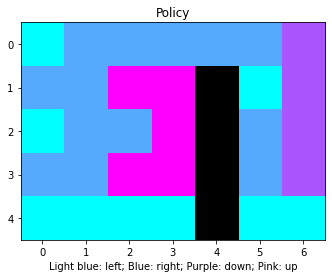

Number of bad policy: 2


In [3]:
from algorithms.DQfD.tabular import tabular_DQfD

n_expert_trajectories = 20
n_step_td = 3
n_expert_iterations = 40
n_rl_iterations = 600
epsilon_decay_limit = 1
update_target_frequency = 10
td_loss_weight = 1
n_td_loss_weight = 0
expert_weight = 0
diff_action_from_expert_penalisation = 1
prioritized_buffer = False
weight_occurencies = False
show_args = {"show_policy":True, "show_value_function": False, "show_statistics": False, "display_frequency": (n_expert_iterations + n_rl_iterations) / 2}

DQfD_Q, DQfD_policy = tabular_DQfD(
    env,
    n_expert_trajectories,
    n_step_td,
    n_expert_iterations,
    n_rl_iterations,
    epsilon_decay_limit,
    update_target_frequency,
    td_loss_weight,
    n_td_loss_weight,
    expert_weight,
    diff_action_from_expert_penalisation,
    prioritized_buffer,
    weight_occurencies,
    **show_args,
)
print("Number of bad policy:", compute_bad_steps(env, DQfD_policy))

#### Real algorithm with random sampling

In [37]:
import time 
import numpy as np

from tqdm import tqdm 
from algorithms.DQfD.tabular import tabular_DQfD

n_expert_trajectories = 20
n_step_td = 3
n_expert_iterations = 0
n_rl_iterations = 100
epsilon_decay_limit = 1
update_target_frequency = 15
td_loss_weight = 1
n_td_loss_weight = 1
expert_weight = 1
diff_action_from_expert_penalisation = 0.01
prioritized_buffer = True
weight_occurencies = True
show_args = {"show_policy":False, "show_value_function": False, "show_statistics": False, "display_frequency": int(n_rl_iterations / 2)}

time_algorithm = []
bad_policies = []

for n_try in tqdm(range(n_tries_for_std)):
    time_begin = time.time()
    DQfD_Q, DQfD_policy = tabular_DQfD(
        env,
        n_expert_trajectories,
        n_step_td,
        n_expert_iterations,
        n_rl_iterations,
        epsilon_decay_limit,
        update_target_frequency,
        td_loss_weight,
        n_td_loss_weight,
        expert_weight,
        diff_action_from_expert_penalisation,
        prioritized_buffer,
        weight_occurencies,
        **show_args,
    )
    time_algorithm.append(time.time() - time_begin)
    bad_policy = compute_bad_steps(env, DQfD_policy)
    print(f"Bad policy: {bad_policy}")
    bad_policies.append(bad_policy)

print(f"Bad policies: {np.around(np.mean(bad_policies), 3)} +- {np.around(np.std(bad_policies), 3)}")
print(f"Average time {np.around(np.mean(time_algorithm), 3)} +- {np.around(np.std(time_algorithm), 3)}")

 10%|█         | 1/10 [00:00<00:01,  5.01it/s]

End of expert phase
Beginning of rl phase
Bad policy: 9
End of expert phase
Beginning of rl phase


 30%|███       | 3/10 [00:00<00:01,  6.33it/s]

Bad policy: 6
End of expert phase
Beginning of rl phase
Bad policy: 6
End of expert phase
Beginning of rl phase


 40%|████      | 4/10 [00:00<00:01,  5.21it/s]

Bad policy: 7
End of expert phase
Beginning of rl phase


 50%|█████     | 5/10 [00:00<00:01,  4.85it/s]

Bad policy: 4
End of expert phase
Beginning of rl phase


 60%|██████    | 6/10 [00:01<00:00,  4.50it/s]

Bad policy: 5
End of expert phase
Beginning of rl phase


 70%|███████   | 7/10 [00:01<00:00,  3.98it/s]

Bad policy: 6
End of expert phase
Beginning of rl phase


 80%|████████  | 8/10 [00:01<00:00,  4.02it/s]

Bad policy: 6
End of expert phase
Beginning of rl phase


 90%|█████████ | 9/10 [00:02<00:00,  3.80it/s]

Bad policy: 8
End of expert phase
Beginning of rl phase


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

Bad policy: 6
Bad policies: 6.3 +- 1.345
Average time 0.229 +- 0.051
